<a href="https://colab.research.google.com/github/zxcasd945/DRL/blob/main/QL_25grids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch # 1 / 100 | Done in 255 steps
epoch # 2 / 100 | Done in 58 steps
epoch # 3 / 100 | Done in 37 steps
epoch # 4 / 100 | Done in 23 steps
epoch # 5 / 100 | Done in 26 steps
epoch # 6 / 100 | Done in 16 steps
epoch # 7 / 100 | Done in 14 steps
epoch # 8 / 100 | Done in 22 steps
epoch # 9 / 100 | Done in 20 steps
epoch # 10 / 100 | Done in 14 steps
epoch # 11 / 100 | Done in 35 steps
epoch # 12 / 100 | Done in 10 steps
epoch # 13 / 100 | Done in 20 steps
epoch # 14 / 100 | Done in 8 steps
epoch # 15 / 100 | Done in 16 steps
epoch # 16 / 100 | Done in 12 steps
epoch # 17 / 100 | Done in 11 steps
epoch # 18 / 100 | Done in 13 steps
epoch # 19 / 100 | Done in 9 steps
epoch # 20 / 100 | Done in 9 steps
epoch # 21 / 100 | Done in 9 steps
epoch # 22 / 100 | Done in 8 steps
epoch # 23 / 100 | Done in 9 steps
epoch # 24 / 100 | Done in 8 steps
epoch # 25 / 100 | Done in 8 steps
epoch # 26 / 100 | Done in 9 steps
epoch # 27 / 100 | Done in 8 steps
epoch # 28 / 100 | Done in 10 steps
epoch # 29

Text(0.5, 0, 'Epochs')

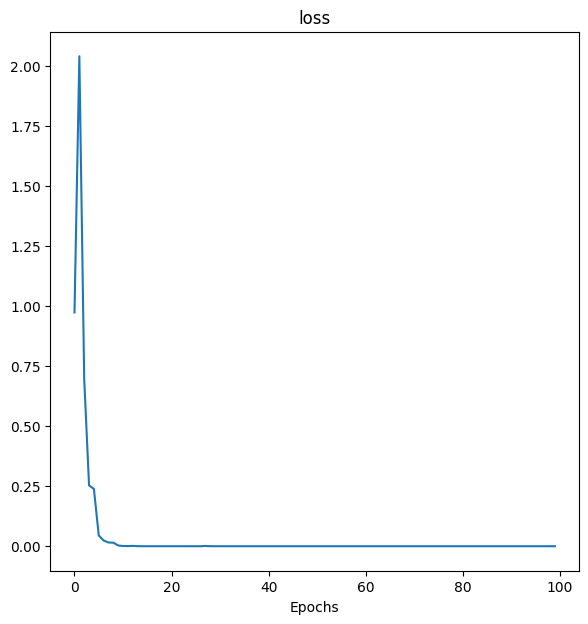

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class Env:
    def __init__(self):
        self.height = 5
        self.width = 5
        self.posX = 0
        self.posY = 0
        self.endX = self.width-1
        self.endY = self.height-1
        self.actions = [0, 1, 2, 3] #left
        self.stateCount = self.height*self.width
        self.actionCount = len(self.actions)

    def reset(self):
        self.posX = 0
        self.posY = 0
        self.done = False
        return 0, 0, False  #State numebr, reward, done or not

    # take action
    def step(self, action):
        if action == 0: # left
            self.posX = self.posX-1 if self.posX > 0 else self.posX
        if action == 1: # right
            self.posX = self.posX+1 if self.posX < self.width - 1 else self.posX
        if action == 2: # up
            self.posY = self.posY-1 if self.posY > 0 else self.posY
        if action == 3: # down
            self.posY = self.posY+1 if self.posY < self.height - 1 else self.posY

        done = self.posX == self.endX and self.posY == self.endY
        # mapping (x,y) position to number between 0 and 5x5-1=24
        nextState = self.width * self.posY + self.posX
        reward = 1 if done else 0
        return nextState, reward, done

    # return a random action
    def randomAction(self):
        return np.random.choice(self.actions)

    # display environment
    def render(self):
      for i in range(self.height):
          for j in range(self.width):
              if self.posY == i and self.posX == j:
                  print("O", end='')
              elif self.endY == i and self.endX == j:
                  print("T", end='')
              else:
                  print(".", end='')
          print("")
import numpy as np
import time
import os

# create environment
env = Env()

# QTable : contains the Q-Values for every (state,action) pair
qtable = np.random.randint(10,size=(env.stateCount, env.actionCount)).tolist()
#np.zeors(x,y)
# hyperparameters
epochs = 100
gamma = 0.1
epsilon = 0.08
decay = 0.1
###################################sparse rewards#############################
# training loop
loss_list= []
total_loss=0
plot_epochs=[]
for i in range(epochs):
    state, reward, done = env.reset()
    steps = 0

    while not done:


        #env.render()


        # count steps to finish game
        steps += 1

        # act randomly sometimes to allow exploration
        if np.random.uniform() < epsilon:
            action = env.randomAction()
        # if not select max action in Qtable (act greedy)
        else:
            action = qtable[state].index(max(qtable[state]))

        # take action
        next_state, reward, done = env.step(action)
        #Current Q
        Current_Q = qtable[state][action]
        #print(Current_Q)
        # update qtable value with Bellman equation
        qtable[state][action] = reward + gamma * max(qtable[next_state])
        #Target Q (TD-target)
        Target_Q=qtable[state][action]
        #Loss
        loss = abs(Target_Q - Current_Q)
        total_loss+=loss

        # update state
        state = next_state
    # The more we learn, the less we take random actions
    epsilon -= decay*epsilon
    total_loss/=steps
    loss_list.append(total_loss)
    print("epoch #", i+1, "/", epochs,"|", "Done in", steps, "steps".format(steps))
    plot_epochs.append(i)

print(f'Final Q table:\n  [      Left          Right           Up            Down     ]\n {np.array(qtable)}')
loss_list
plot_epochs
print(loss_list)
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(plot_epochs,loss_list)
plt.title('loss')
plt.xlabel('Epochs')

In [ ]:
import numpy as np
from scipy.optimize import root_scalar

# Define the function corresponding to the cubic equation
def f(x):
    return x**3 - 4*x**2 + 104*x - 424

# Use the root_scalar function to find the roots
solutions = root_scalar(f, bracket=[-10, 10])  # Provide a suitable bracket

# The solutions will be in solutions.root
print("Solutions (x):", solutions.root)

Solutions (x): 4.066370560201566


In [ ]:
qtable = np.random.randn(env.stateCount, env.actionCount)
qtable

array([[ 1.32637195e+00,  5.45835689e-01, -7.50899332e-01,
         4.28630674e-01],
       [-1.29410424e-02,  1.53744031e+00,  5.58577397e-01,
        -1.13296824e-01],
       [-7.00555658e-01, -4.95482701e-01, -7.58698420e-01,
         7.73299377e-01],
       [-5.72426170e-01,  9.16218047e-01, -2.89351700e-02,
        -1.59874367e-01],
       [ 1.31979301e+00,  9.29397562e-01, -2.12368781e-02,
        -1.18832157e+00],
       [ 1.47272447e+00,  7.29927979e-01, -4.22502465e-01,
         1.04866587e+00],
       [-1.19149098e+00, -3.63140773e-01, -8.01825954e-01,
        -5.93466514e-01],
       [-3.08739742e-01, -2.53142069e-02,  3.58343204e-01,
        -1.86746250e-01],
       [ 3.97579756e-01, -4.59592660e-02,  6.66376971e-04,
         9.39178076e-02],
       [-1.43105519e-01,  1.44342570e-01, -8.95812209e-02,
         9.46762541e-01],
       [ 7.13546072e-01,  7.21840454e-01,  1.78202136e+00,
         1.56879528e+00],
       [ 2.83930818e-01,  7.76220034e-01, -2.25858953e-02,
      